In [9]:
from custom_fuzzy_ops import ImpliesReichenbachSigmoidal
import torch
import numpy as np
import matplotlib.pyplot as plt
import ltn
from globals_ltn import Godel, KleeneDienes, Goguen, Reichenbach, Luk

In [10]:
def plot_connectives(connective_dict):
    # Define the fuzzy logic operators from the LTN library
    Not = connective_dict["Not"]
    And = connective_dict["And"]
    Or = connective_dict["Or"]
    Implies = connective_dict["Implies"]
    Equiv = ltn.Connective(ltn.fuzzy_ops.Equiv(And.connective_op, Implies.connective_op))

    # Generate input values (truth values)
    A_values = torch.linspace(0, 1, 100)  # 100 values from 0 to 1
    B_values = torch.linspace(0, 1, 100)

    # Create meshgrid for plotting
    # A_grid, B_grid = torch.meshgrid(A_values, B_values)
    A_grid = ltn.Variable("A", A_values)
    B_grid = ltn.Variable("B", B_values)


    # Calculate fuzzy logic operations using LTN's connectives
    not_A = And(Not(A_grid), Not(B_grid)).value
    and_prod = And(A_grid, B_grid).value
    or_prob_sum = Or(A_grid, B_grid).value
    imp_reichenbach = Implies(A_grid, B_grid).value
    equiv = Equiv(A_grid, B_grid).value
    LEM = Not(Equiv(Not(Not(A_grid)), Not(B_grid))).value
    XOR = And(Or(A_grid, B_grid), Not(And(A_grid, B_grid))).value
    Test = Equiv(Not(Not(A_grid)), Not(B_grid)).value



    # Plot the results
    fig, axs = plt.subplots(4, 2, figsize=(12, 20))

    # Plot Negation
    axs[0, 0].imshow(not_A, extent=[0, 1, 0, 1], origin='lower', cmap='viridis')
    axs[0, 0].set_title("Negation (NotStandard)")
    axs[0, 0].set_xlabel("A")
    axs[0, 0].set_ylabel("B")

    # Plot AND (Prod)
    axs[0, 1].imshow(and_prod, extent=[0, 1, 0, 1], origin='lower', cmap='viridis')
    axs[0, 1].set_title("AND (Prod)")
    axs[0, 1].set_xlabel("A")
    axs[0, 1].set_ylabel("B")

    # Plot OR (ProbSum)
    axs[1, 0].imshow(or_prob_sum, extent=[0, 1, 0, 1], origin='lower', cmap='viridis')
    axs[1, 0].set_title("OR (ProbSum)")
    axs[1, 0].set_xlabel("A")
    axs[1, 0].set_ylabel("B")

    # Plot Implication (Reichenbach)
    axs[1, 1].imshow(imp_reichenbach, extent=[0, 1, 0, 1], origin='lower', cmap='viridis')
    axs[1, 1].set_title("Implication (Reichenbach)")
    axs[1, 1].set_xlabel("A")
    axs[1, 1].set_ylabel("B")

    # Plot Equivalence (Equiv)
    axs[2, 0].imshow(equiv, extent=[0, 1, 0, 1], origin='lower', cmap='viridis')
    axs[2, 0].set_title("Equivalence (AndProd + Reichenbach)")
    axs[2, 0].set_xlabel("A")
    axs[2, 0].set_ylabel("B")

    # Plot Equivalence (Equiv)
    axs[2, 1].imshow(LEM, extent=[0, 1, 0, 1], origin='lower', cmap='viridis')
    axs[2, 1].set_title("NOTequiv")
    axs[2, 1].set_xlabel("A")
    axs[2, 1].set_ylabel("B")

    axs[3, 0].imshow(XOR, extent=[0, 1, 0, 1], origin='lower', cmap='viridis')
    axs[3, 0].set_title("XOR")
    axs[3, 0].set_xlabel("A")
    axs[3, 0].set_ylabel("B")

    # Plot Equivalence (Equiv)
    axs[3, 1].imshow(Test, extent=[0, 1, 0, 1], origin='lower', cmap='viridis')
    axs[3, 1].set_title("Not(And)")
    axs[3, 1].set_xlabel("A")
    axs[3, 1].set_ylabel("B")


    # Hide the empty subplot
    axs[2, 1].axis('off')

    # Show plot
    plt.tight_layout()
    plt.show()

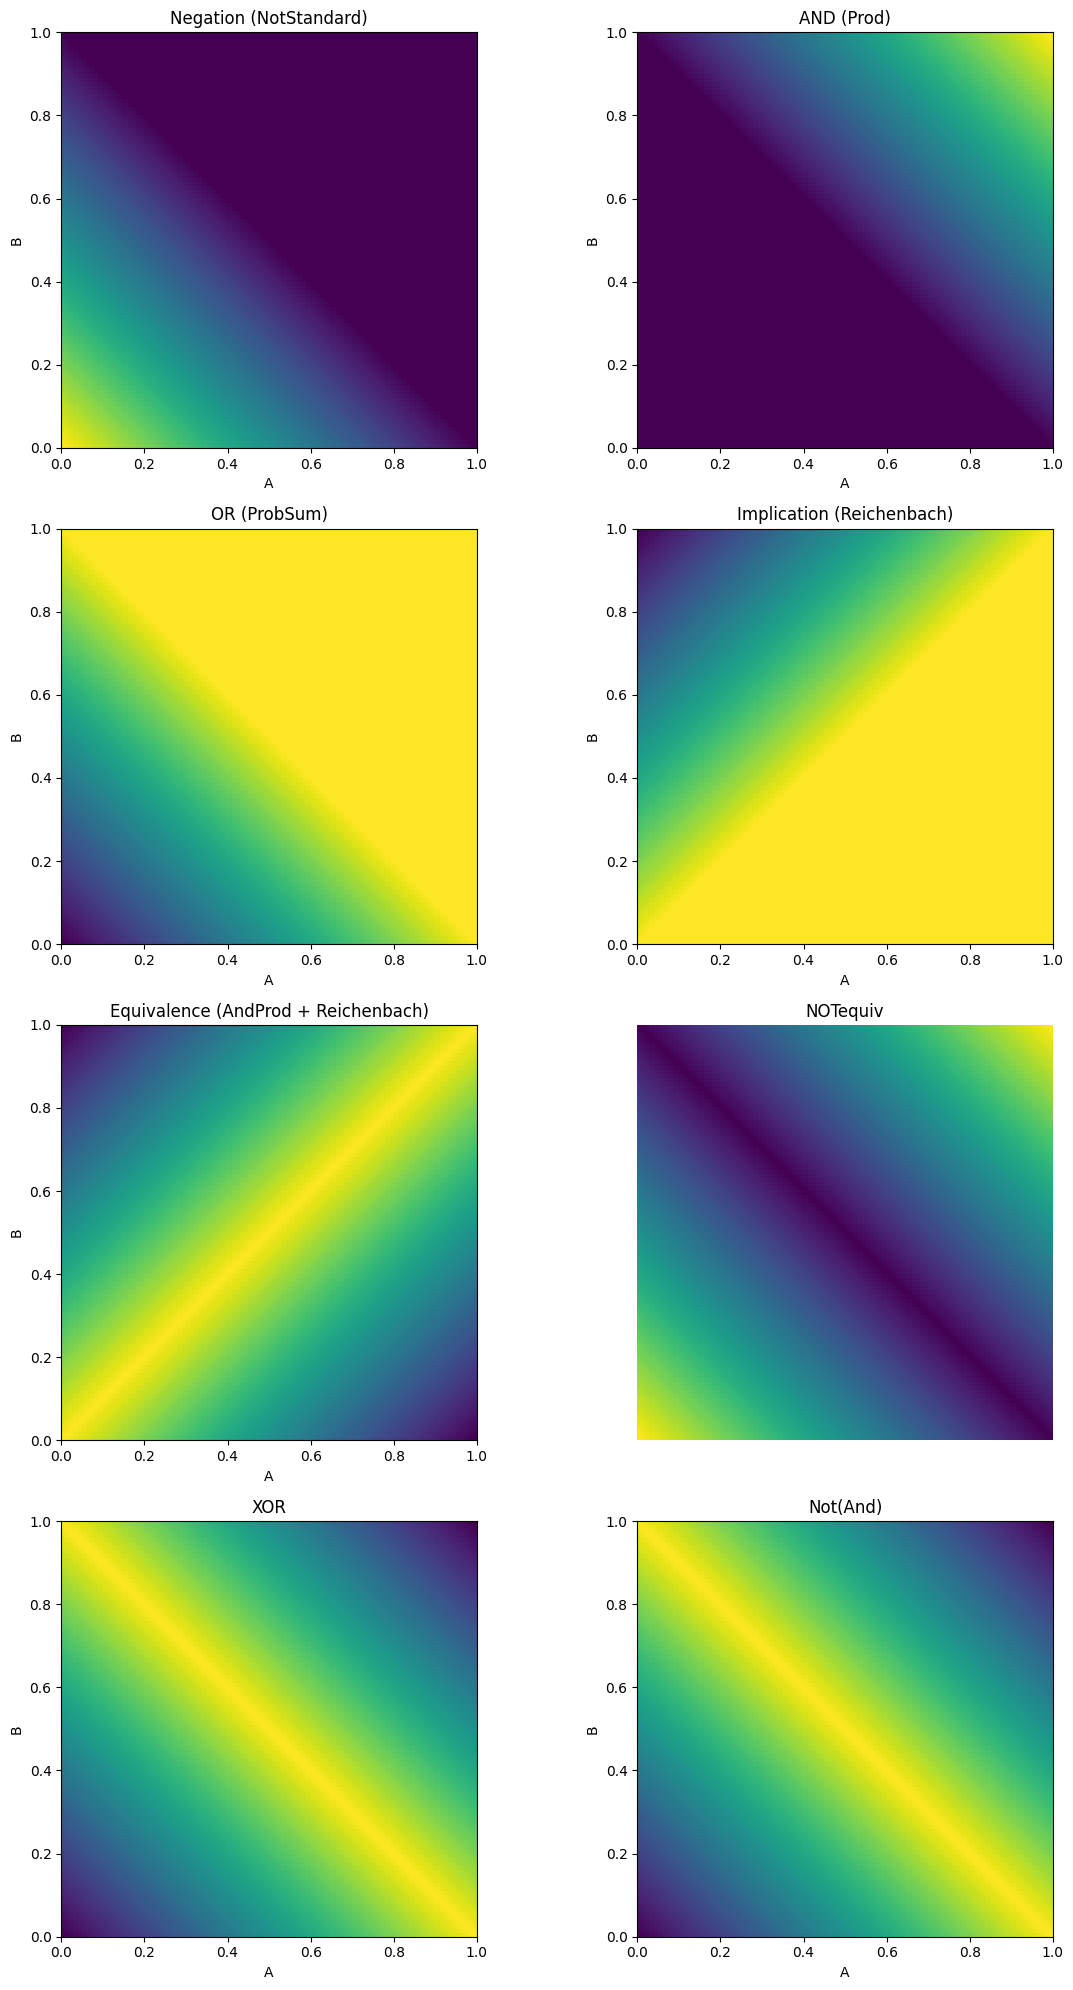

In [11]:
plot_connectives(Luk)

In [12]:
assert False

AssertionError: 

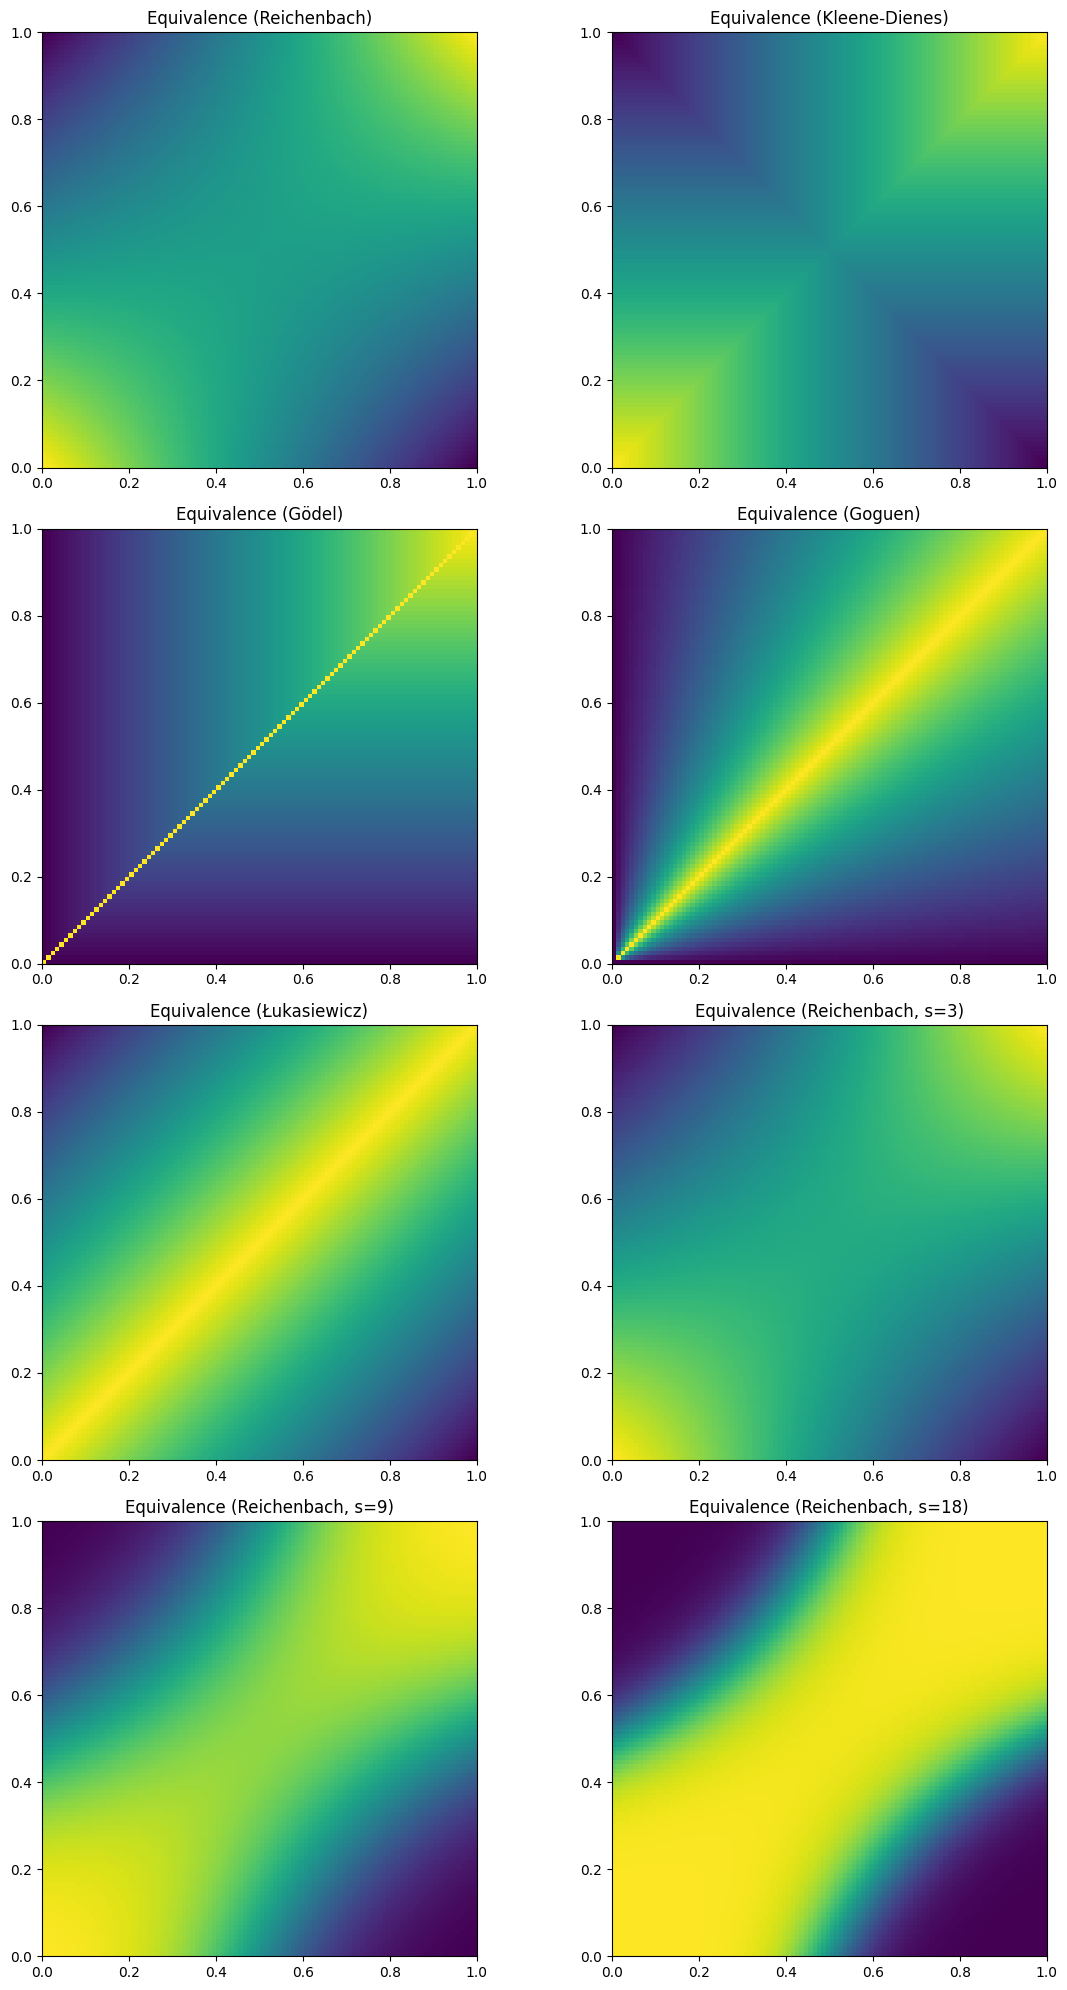

In [27]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import ltn

# Define the fuzzy logic operators from the LTN library
Not = ltn.Connective(ltn.fuzzy_ops.NotStandard())
And = ltn.Connective(ltn.fuzzy_ops.AndProd())
Or = ltn.Connective(ltn.fuzzy_ops.OrProbSum())

# Define various implication operators
Implies_reichenbach = ltn.fuzzy_ops.ImpliesReichenbach()
Implies_kleene_diene = ltn.fuzzy_ops.ImpliesKleeneDienes()
Implies_godel = ltn.fuzzy_ops.ImpliesGodel()
Implies_Goguen = ltn.fuzzy_ops.ImpliesGoguen()
Implies_Luk = ltn.fuzzy_ops.ImpliesLuk()

Implies_Reichen_sigm_s3 = ImpliesReichenbachSigmoidal(s=3)
Implies_Reichen_sigm_s9 = ImpliesReichenbachSigmoidal(s=9)
Implies_Reichen_sigm_s18 = ImpliesReichenbachSigmoidal(s=18)

# Generate input values (truth values)
A_values = torch.linspace(0, 1, 100)  # 100 values from 0 to 1
B_values = torch.linspace(0, 1, 100)

A_grid = ltn.Variable("A", A_values)
B_grid = ltn.Variable("B", B_values)


# Calculate implications and equivalences
equiv_imp_reichenbach = ltn.Connective(ltn.fuzzy_ops.Equiv(ltn.fuzzy_ops.AndProd(), ltn.fuzzy_ops.ImpliesReichenbach()))(A_grid, B_grid).value
equiv_imp_kleene_diene = ltn.Connective(ltn.fuzzy_ops.Equiv(ltn.fuzzy_ops.AndMin(), ltn.fuzzy_ops.ImpliesKleeneDienes()))(A_grid, B_grid).value
equiv_imp_godel = ltn.Connective(ltn.fuzzy_ops.Equiv(ltn.fuzzy_ops.AndMin(), ltn.fuzzy_ops.ImpliesGodel()))(A_grid, B_grid).value
equiv_imp_Goguen = ltn.Connective(ltn.fuzzy_ops.Equiv(ltn.fuzzy_ops.AndProd(), ltn.fuzzy_ops.ImpliesGoguen()))(A_grid, B_grid).value
equiv_imp_Luk = ltn.Connective(ltn.fuzzy_ops.Equiv(ltn.fuzzy_ops.AndLuk(), ltn.fuzzy_ops.ImpliesLuk()))(A_grid, B_grid).value
equiv_imp_Reichen_sigm_s3 = ltn.Connective(ltn.fuzzy_ops.Equiv(ltn.fuzzy_ops.AndProd(), ImpliesReichenbachSigmoidal(s=3)))(A_grid, B_grid).value
equiv_imp_Reichen_sigm_s9 = ltn.Connective(ltn.fuzzy_ops.Equiv(ltn.fuzzy_ops.AndProd(), ImpliesReichenbachSigmoidal(s=9)))(A_grid, B_grid).value
equiv_imp_Reichen_sigm_s18 = ltn.Connective(ltn.fuzzy_ops.Equiv(ltn.fuzzy_ops.AndProd(), ImpliesReichenbachSigmoidal(s=18)))(A_grid, B_grid).value

# Plot the results
fig, axs = plt.subplots(4, 2, figsize=(12, 20))

# Plot implications
axs[0, 0].imshow(equiv_imp_reichenbach, extent=[0, 1, 0, 1], origin='lower', cmap='viridis')
axs[0, 0].set_title("Equivalence (Reichenbach)")
axs[0, 1].imshow(equiv_imp_kleene_diene, extent=[0, 1, 0, 1], origin='lower', cmap='viridis')
axs[0, 1].set_title("Equivalence (Kleene-Dienes)")
axs[1, 0].imshow(equiv_imp_godel, extent=[0, 1, 0, 1], origin='lower', cmap='viridis')
axs[1, 0].set_title("Equivalence (Gödel)")
axs[1, 1].imshow(equiv_imp_Goguen, extent=[0, 1, 0, 1], origin='lower', cmap='viridis')
axs[1, 1].set_title("Equivalence (Goguen)")
axs[2, 0].imshow(equiv_imp_Luk, extent=[0, 1, 0, 1], origin='lower', cmap='viridis')
axs[2, 0].set_title("Equivalence (Łukasiewicz)")
axs[2, 1].imshow(equiv_imp_Reichen_sigm_s3, extent=[0, 1, 0, 1], origin='lower', cmap='viridis')
axs[2, 1].set_title("Equivalence (Reichenbach, s=3)")
axs[3, 0].imshow(equiv_imp_Reichen_sigm_s9, extent=[0, 1, 0, 1], origin='lower', cmap='viridis')
axs[3, 0].set_title("Equivalence (Reichenbach, s=9)")
axs[3, 1].imshow(equiv_imp_Reichen_sigm_s18, extent=[0, 1, 0, 1], origin='lower', cmap='viridis')
axs[3, 1].set_title("Equivalence (Reichenbach, s=18)")

plt.tight_layout()
plt.show()

In [26]:
assert False

AssertionError: 

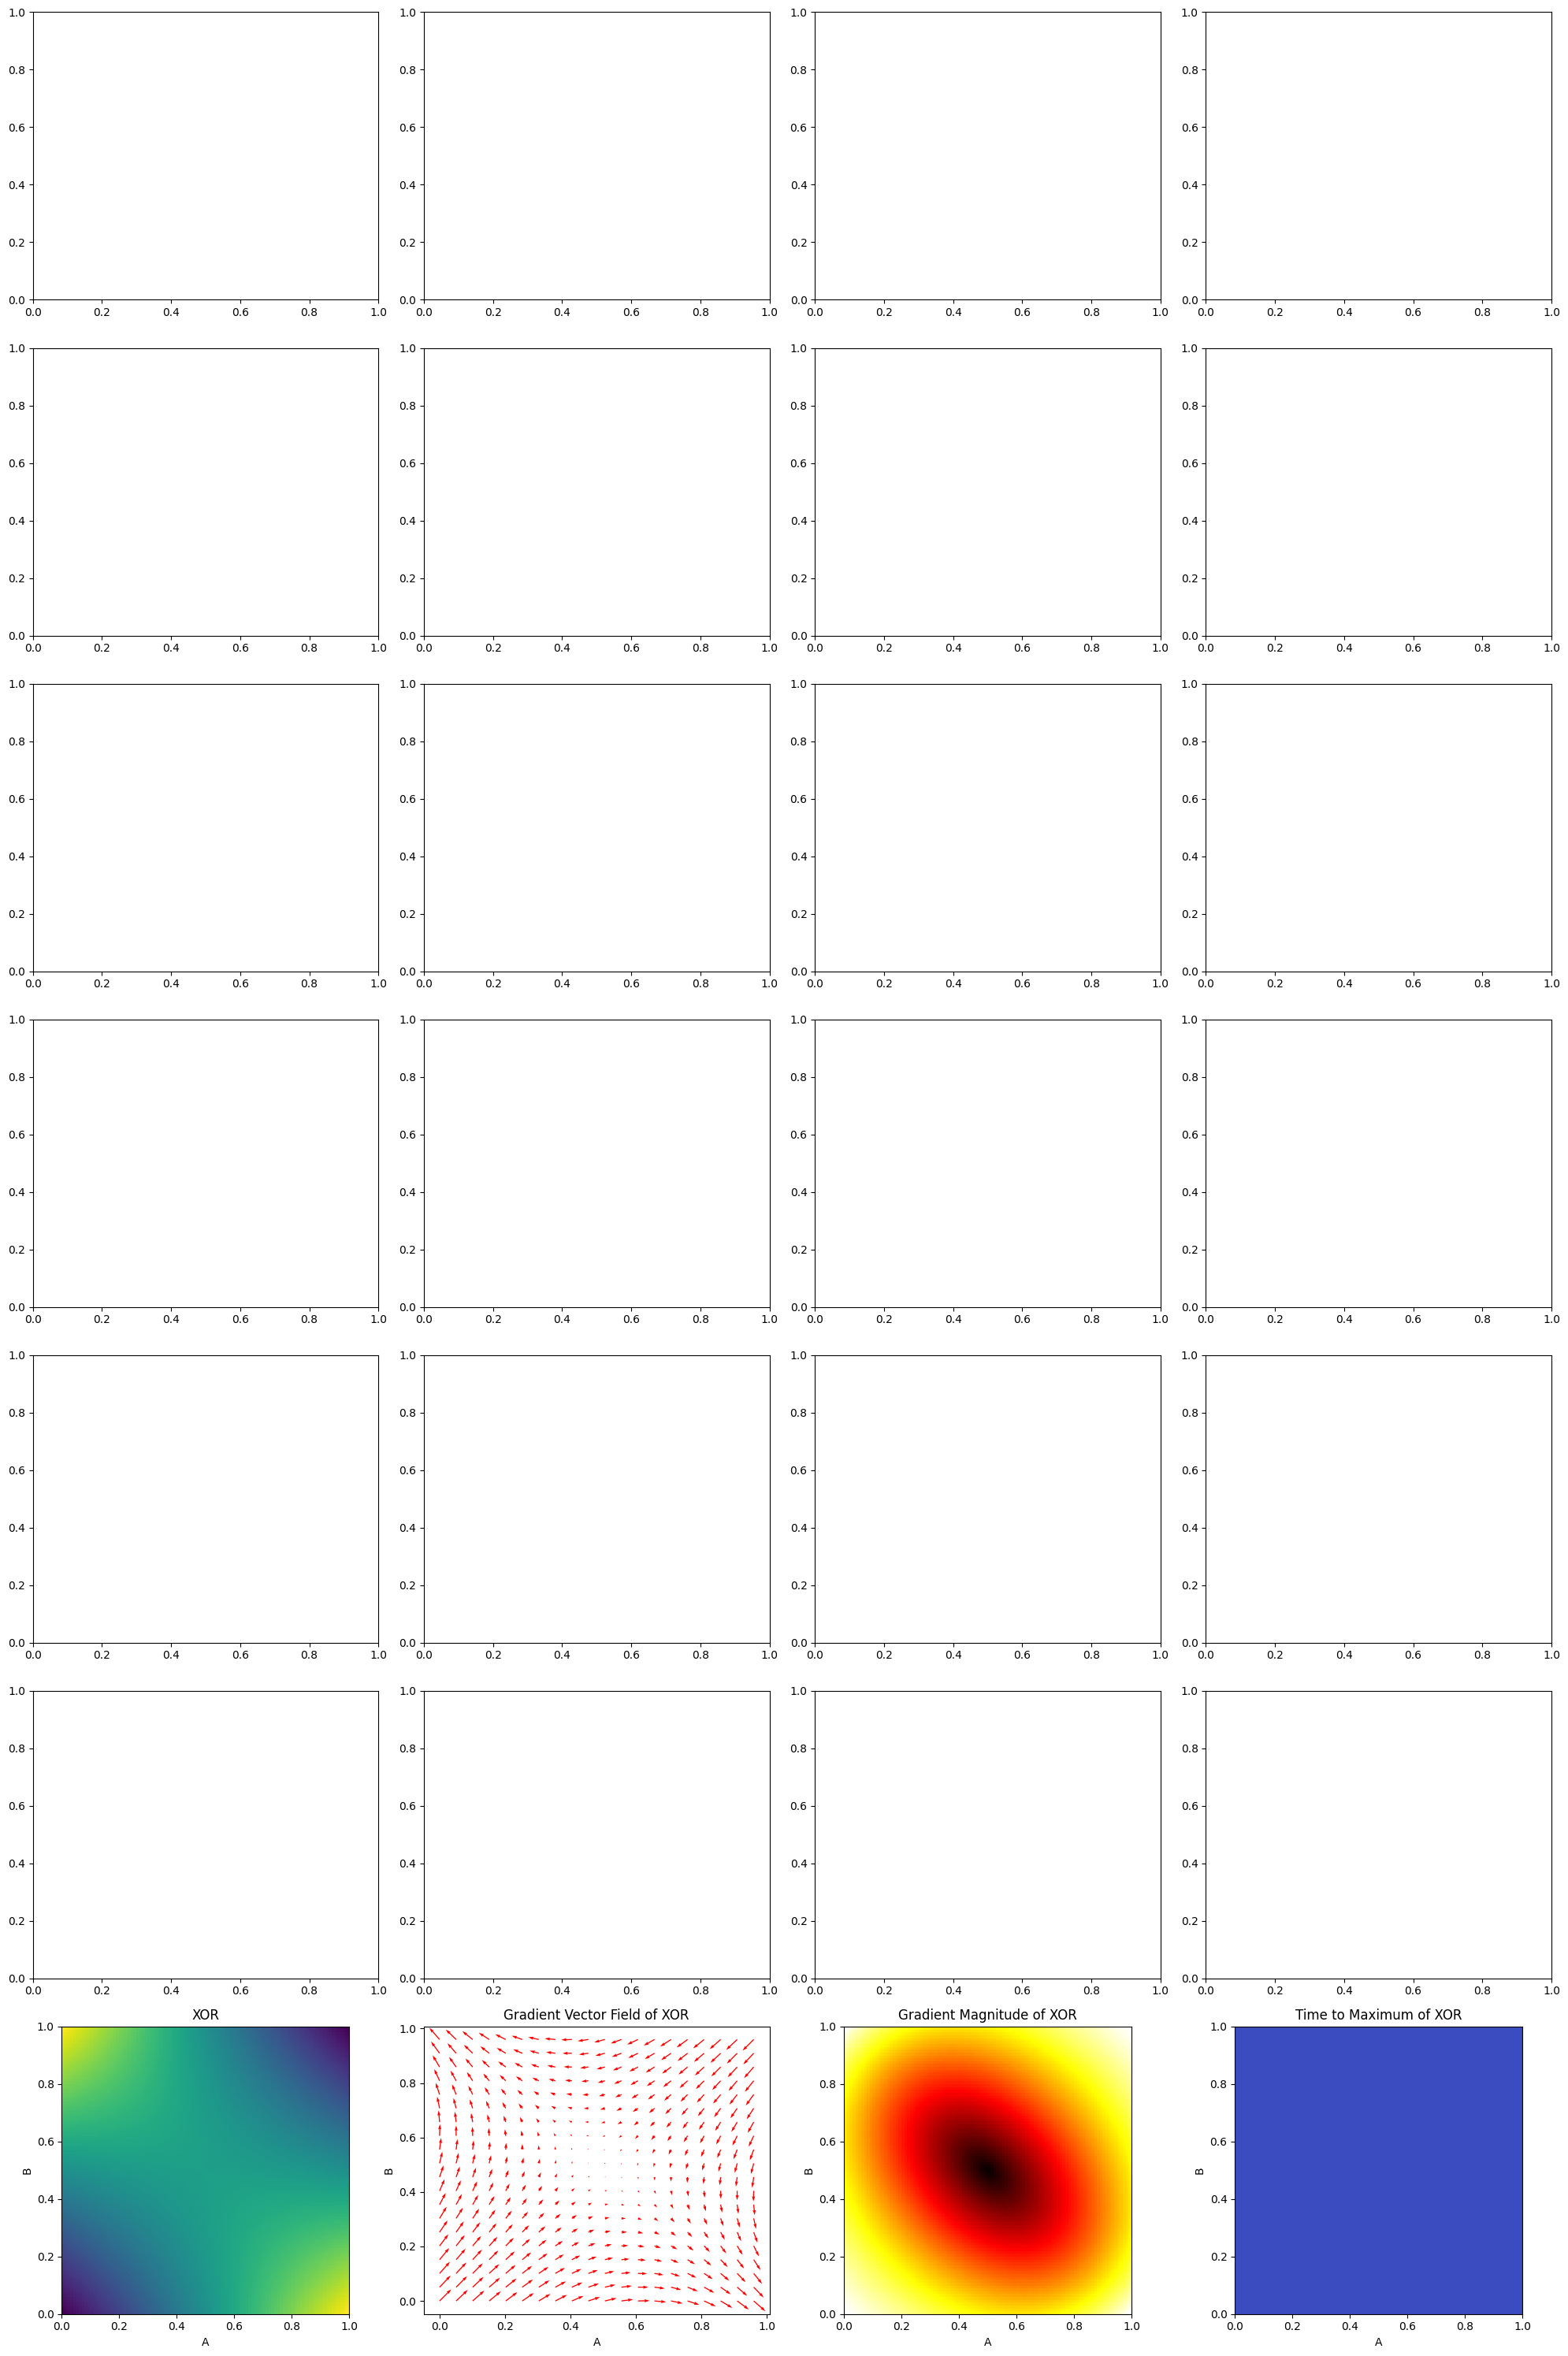

In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import ltn

# Define the fuzzy logic operators from the LTN library
Not = ltn.Connective(ltn.fuzzy_ops.NotStandard())
And = ltn.Connective(ltn.fuzzy_ops.AndProd())
Or = ltn.Connective(ltn.fuzzy_ops.OrProbSum())
Implies = ltn.Connective(ltn.fuzzy_ops.ImpliesReichenbach())
Equiv = ltn.Connective(ltn.fuzzy_ops.Equiv(ltn.fuzzy_ops.AndProd(), ltn.fuzzy_ops.ImpliesReichenbach()))

# Generate input values (truth values)
A_values = torch.linspace(0, 1, 100)  # 100 values from 0 to 1
B_values = torch.linspace(0, 1, 100)

# Create meshgrid for plotting
A_grid = ltn.Variable("A", A_values)
B_grid = ltn.Variable("B", B_values)

# Calculate fuzzy logic operations using LTN's connectives
not_A = And(Not(A_grid), Not(B_grid)).value
and_prod = And(A_grid, B_grid).value
or_prob_sum = Or(A_grid, B_grid).value
imp_reichenbach = Implies(A_grid, B_grid).value
equiv = Equiv(A_grid, B_grid).value
NOTequiv = Not(Equiv(A_grid, B_grid)).value
XOR = And(Or(A_grid, B_grid), Not(And(A_grid, B_grid))).value

# Create a figure with enough rows for each operator and its four plots
fig, axs = plt.subplots(7, 4, figsize=(20, 30))

def compute_time_to_max_parallel(data, lr=100, max_steps=100, tol=1e-5):
    # Identify maxima as points where data is close to 1
    maxima = data.isclose(torch.ones_like(data), atol=0.0001)

    # Create tensor for time to max, initialized to zero
    time_to_max = torch.zeros_like(data, dtype=torch.float32)
    
    # Compute gradients using torch.gradient
    grad_y, grad_x = torch.gradient(data)

    # Flatten the grid for easier indexing and parallel operations
    h, w = data.shape
    pos_x, pos_y = torch.meshgrid(torch.arange(h, dtype=torch.float32), torch.arange(w, dtype=torch.float32), indexing="ij")
    
    # Reshape gradients to match positions
    grad_y = grad_y.reshape(h, w)
    grad_x = grad_x.reshape(h, w)
    
    # Initialize positions (all points in the grid)
    positions_x = pos_x.clone()
    positions_y = pos_y.clone()

    # Mask to track which points have reached a maximum
    not_converged = ~maxima.clone()
    
    # Iterate for a maximum number of steps
    for step in range(max_steps):
        if not not_converged.any():
            break  # All points have converged

        # Compute gradients at current positions
        grad_at_pos_x = grad_x[(positions_x.long(), positions_y.long())]
        grad_at_pos_y = grad_y[(positions_x.long(), positions_y.long())]
        grad_norm = torch.sqrt(grad_at_pos_x**2 + grad_at_pos_y**2)

        # Update positions using the gradients for points that haven't converged
        update_mask = (grad_norm > tol) & not_converged
        positions_x[update_mask] += lr * grad_at_pos_x[update_mask]
        positions_y[update_mask] += lr * grad_at_pos_y[update_mask]

        # Clamp positions to remain within bounds
        positions_x = torch.clamp(positions_x, 0, h - 1)
        positions_y = torch.clamp(positions_y, 0, w - 1)

        # Check if points are sufficiently close to a maximum
        close_to_max = data[(positions_x.long(), positions_y.long())].isclose(torch.tensor(1.0), atol=tol)
        not_converged = not_converged & ~close_to_max

        # Increment time for all points still converging
        time_to_max[not_converged] += 1

    return time_to_max

# Define a function to compute gradient, its magnitude, and time to maximum
def plot_gradient(ax, data, title, row):
    # Calculate gradients using torch.gradient
    grad_y, grad_x = torch.gradient(data)
    grad_y *= 100
    grad_x *= 100
    magnitude = torch.sqrt(grad_x**2 + grad_y**2)

    # Plot the scalar field
    ax[0].imshow(data, extent=[0, 1, 0, 1], origin='lower', cmap='viridis')
    ax[0].set_title(title)
    ax[0].set_xlabel("A")
    ax[0].set_ylabel("B")

    # Define a step for quiver
    step = 5  # Adjust this value for more or fewer arrows

    # Plot gradient vector field with larger arrows
    ax[1].quiver(A_values.numpy()[::step], B_values.numpy()[::step], 
                 grad_x[::step, ::step].numpy(), grad_y[::step, ::step].numpy(), 
                 color='r', scale=30)  # Adjust scale for larger arrows
    ax[1].set_title(f"Gradient Vector Field of {title}")
    ax[1].set_xlabel("A")
    ax[1].set_ylabel("B")

    # Plot heatmap of gradient magnitude
    ax[2].imshow(magnitude.detach().numpy(), extent=[0, 1, 0, 1], origin='lower', cmap='hot')
    ax[2].set_title(f"Gradient Magnitude of {title}")
    ax[2].set_xlabel("A")
    ax[2].set_ylabel("B")

    # Compute time to nearest maximum and plot
    time_to_max = compute_time_to_max_parallel(data.detach())
    ax[3].imshow(time_to_max, extent=[0, 1, 0, 1], origin='lower', cmap='coolwarm')
    ax[3].set_title(f"Time to Maximum of {title}")
    ax[3].set_xlabel("A")
    ax[3].set_ylabel("B")

# # Plot for Negation
# plot_gradient(axs[0], not_A, "Negation (NotStandard)", 0)

# # Plot for AND (Prod)
# plot_gradient(axs[1], and_prod, "AND (Prod)", 1)

# # Plot for OR (ProbSum)
# plot_gradient(axs[2], or_prob_sum, "OR (ProbSum)", 2)

# # Plot for Implication (Reichenbach)
# plot_gradient(axs[3], imp_reichenbach, "Implication (Reichenbach)", 3)

# # Plot for Equivalence (Equiv)
# plot_gradient(axs[4], equiv, "Equivalence (AndProd + Reichenbach)", 4)

# # Plot for NOTequiv
# plot_gradient(axs[5], NOTequiv, "NOTequiv", 5)

# Plot for XOR
plot_gradient(axs[6], XOR, "XOR", 6)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

